## Here we compare different CNN models with different structures but almost identical architecture to see if modifications affect models performances using first pooling layer adjustments into relation to symmetries of detector images

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import sys
from pathlib import Path
import math

#torch 
import torch
import torchvision as torchv
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch import Tensor
from torch.utils import data
from torchsummary import summary

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

In [2]:
#Sjekke om device GPU er på
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


In [3]:
#Metode for å hente data frå mappe
module_path = str(Path.cwd().parents[0].parents[0] / "methods")

if module_path not in sys.path:
    sys.path.append(module_path)

from dataloader import *
# from plotCreator import *

data_path0 = str(Path.cwd().parents[0].parents[0] / "data" / "BH_n4_M10_res50_15000_events.h5")
data_path1 = str(Path.cwd().parents[0].parents[0] / "data" / "PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL_res50_15000_events.h5")

In [4]:
import train
import nnmodel

Running on the GPU


In [5]:
#Hente data og sette til array
bhArray = dataToArray(data_path0)
sphArray = dataToArray(data_path1)

In [6]:
#Kombinerer dataene for å kunne kjøre gjennom modellen på et samlet datasett
dataArray = np.concatenate((bhArray,sphArray),axis=0)

In [7]:
# Labeler tabelle med 1 og 0 (0 = svart hull, 1 = spahleron)
labelsArray = np.concatenate((np.zeros(np.shape(bhArray)[0]),np.ones(np.shape(sphArray)[0])),axis=0)

In [8]:
#Split data 75% i train og 25% i test
trainData, testData, trainLabels, testLabels = train_test_split(dataArray, labelsArray, random_state=42)

In [9]:
#Transofrm from numpy array to torch
trainData = torch.from_numpy(trainData).permute(0,3,1,2)
testData = torch.from_numpy(testData).permute(0,3,1,2)
trainLabels = torch.from_numpy(trainLabels)
testLabels = torch.from_numpy(testLabels)

In [10]:
#Transformere numpy til tensor
train = torch.utils.data.TensorDataset(trainData, trainLabels)
test = torch.utils.data.TensorDataset(testData, testLabels)

In [11]:
#Transform data data to dataloader
trainLoader = DataLoader(train, shuffle=True, batch_size=200)
testLoader = DataLoader(test, shuffle=True, batch_size=200)

In [12]:
model = nnmodel.ConvModel(0.5).to(device)  # Move the model to the appropriate device

# Print the model summary, make sure to provide appropriate input size (3, 50, 50) for the 3-channel 50x50 images
summary(model, (3, 50, 50))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 50, 50]           1,792
       BatchNorm2d-2           [-1, 64, 50, 50]             128
            Conv2d-3          [-1, 128, 25, 25]          73,856
       BatchNorm2d-4          [-1, 128, 25, 25]             256
            Conv2d-5          [-1, 256, 12, 12]         295,168
       BatchNorm2d-6          [-1, 256, 12, 12]             512
            Conv2d-7            [-1, 512, 6, 6]       1,180,160
       BatchNorm2d-8            [-1, 512, 6, 6]           1,024
            Conv2d-9           [-1, 1024, 3, 3]       4,719,616
      BatchNorm2d-10           [-1, 1024, 3, 3]           2,048
           Linear-11                 [-1, 2048]       2,099,200
          Dropout-12                 [-1, 2048]               0
           Linear-13                  [-1, 512]       1,049,088
          Dropout-14                  [

In [13]:
model = nnmodel.ConvModel(0.5).to(device)  # Move the model to the appropriate device

# Print the model summary, make sure to provide appropriate input size (3, 50, 50) for the 3-channel 50x50 images
summary(model, (3, 50, 50))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 50, 50]           1,792
       BatchNorm2d-2           [-1, 64, 50, 50]             128
            Conv2d-3          [-1, 128, 25, 25]          73,856
       BatchNorm2d-4          [-1, 128, 25, 25]             256
            Conv2d-5          [-1, 256, 12, 12]         295,168
       BatchNorm2d-6          [-1, 256, 12, 12]             512
            Conv2d-7            [-1, 512, 6, 6]       1,180,160
       BatchNorm2d-8            [-1, 512, 6, 6]           1,024
            Conv2d-9           [-1, 1024, 3, 3]       4,719,616
      BatchNorm2d-10           [-1, 1024, 3, 3]           2,048
           Linear-11                 [-1, 2048]       2,099,200
          Dropout-12                 [-1, 2048]               0
           Linear-13                  [-1, 512]       1,049,088
          Dropout-14                  [

In [14]:
model = nnmodel.ConvModelFPLMod(0.5).to(device)  # Move the model to the appropriate device

# Print the model summary, make sure to provide appropriate input size (3, 50, 50) for the 3-channel 50x50 images
summary(model, (3, 50, 50))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 50, 50]           1,792
       BatchNorm2d-2           [-1, 64, 50, 50]             128
            Conv2d-3          [-1, 128, 25, 25]          73,856
       BatchNorm2d-4          [-1, 128, 25, 25]             256
            Conv2d-5          [-1, 256, 12, 12]         295,168
       BatchNorm2d-6          [-1, 256, 12, 12]             512
            Conv2d-7            [-1, 512, 6, 6]       1,180,160
       BatchNorm2d-8            [-1, 512, 6, 6]           1,024
            Conv2d-9           [-1, 1024, 3, 3]       4,719,616
      BatchNorm2d-10           [-1, 1024, 3, 3]           2,048
           Linear-11                 [-1, 2048]       2,099,200
          Dropout-12                 [-1, 2048]               0
           Linear-13                  [-1, 512]       1,049,088
          Dropout-14                  [

Koden under utfører treningen og plotter alt i noen utvalgte grafer, må ryddes i for å få bedre oversikt!

In [15]:
import train

In [16]:
def train_multiple_runs(model_class, n_runs, n_epochs, train_loader, test_loader, dropout):
    all_run_metrics = []

    for run in range(n_runs):
        print(f"Run: {run + 1}/{n_runs}")

        model = model_class(dropout=dropout).to(device)
        optimizer = torch.optim.Adam(model.parameters())
        criterion = nn.CrossEntropyLoss().to(device)

        run_results = train.train(model, train_loader, test_loader, optimizer, criterion, n_epochs)
        all_run_metrics.append(run_results)

    # Compute average metrics
    avg_run_metrics = {}
    for metric in all_run_metrics[0][-1].keys():
        if metric not in ['all_preds', 'all_labels', 'epoch']:
            avg_run_metrics[metric] = [np.mean([run[epoch][metric] for run in all_run_metrics]) for epoch in range(n_epochs)]

    return avg_run_metrics


In [17]:
import pandas as pd

def display_tabular_data(all_run_metrics, model_classes):
    data = {}
    for i, run_metrics in enumerate(all_run_metrics):
        for metric, values in run_metrics.items():
            data[f"{model_classes[i].__name__} {metric}"] = values

    df = pd.DataFrame(data)
    display(df)

Run: 1/3
Run: 2/3
Run: 3/3
Run: 1/3
Run: 2/3
Run: 3/3
Run: 1/3
Run: 2/3
Run: 3/3
Run: 1/3
Run: 2/3
Run: 3/3


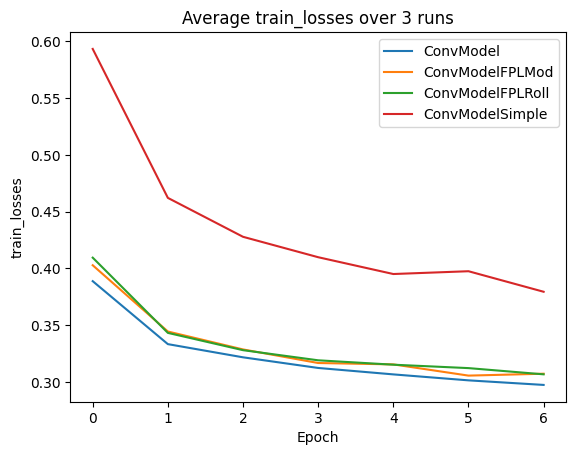

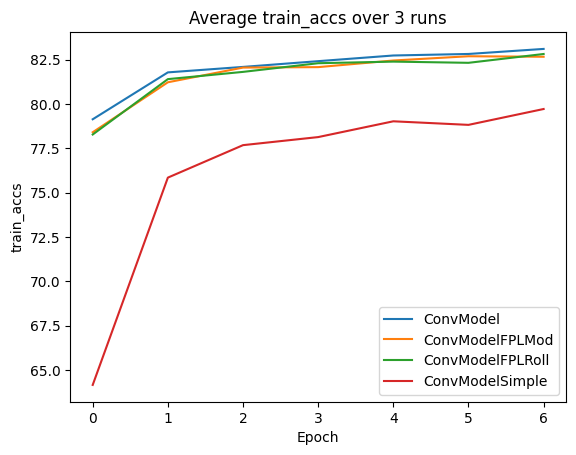

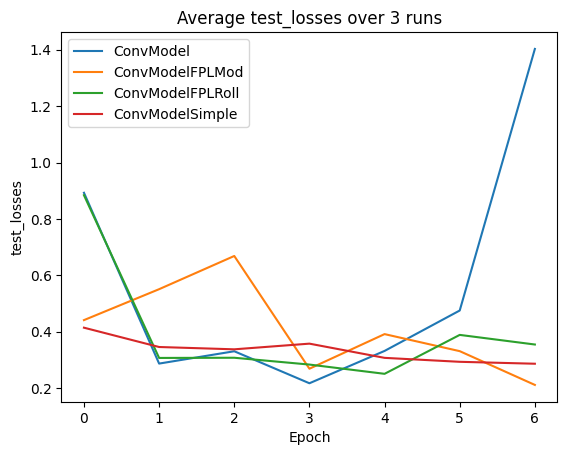

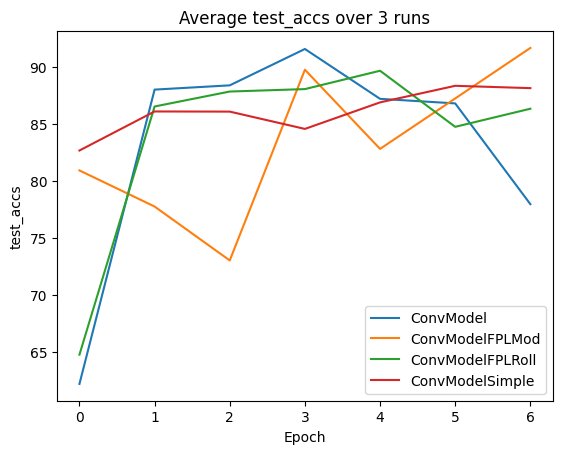

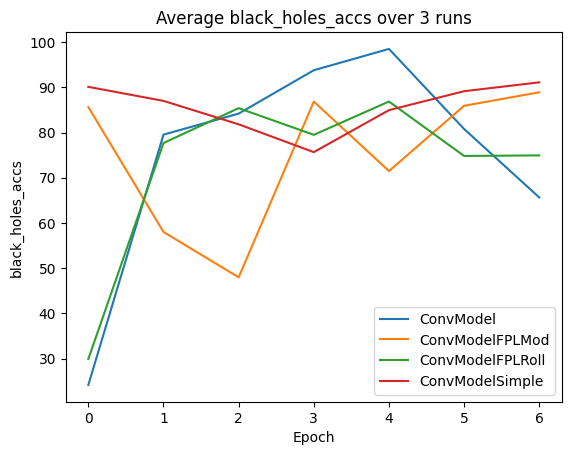

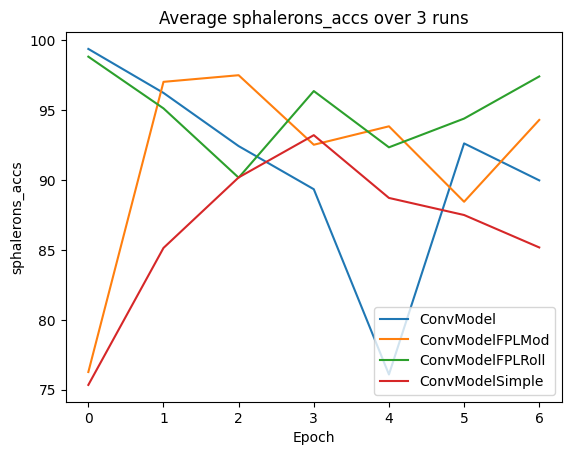

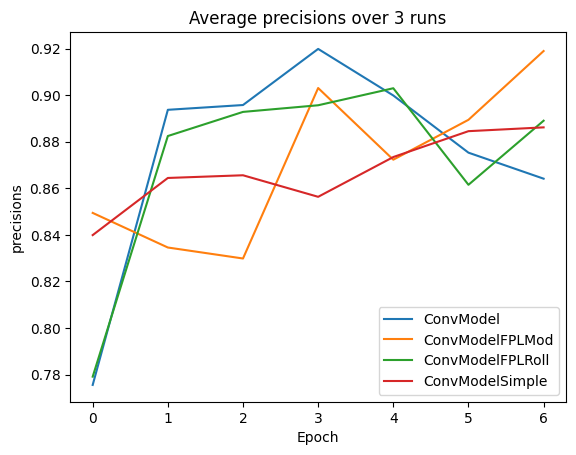

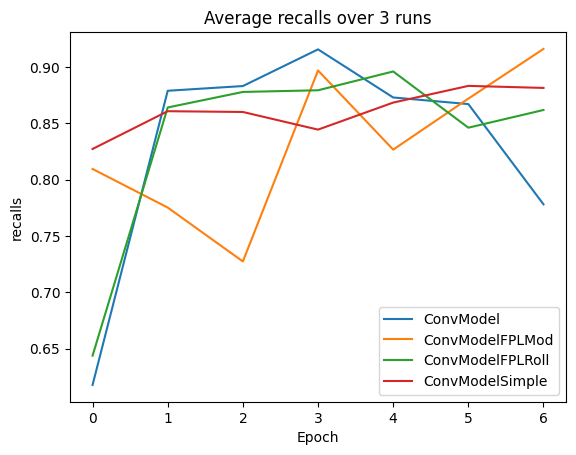

Metrics for ConvModel:


,train_losses,train_accs,test_losses,test_accs,black_holes_accs,sphalerons_accs,precisions,recalls
0,0.388805,79.142222,0.892673,62.186667,24.157455,99.393300,0.775591,0.617754
1,0.333319,81.786667,0.286875,87.982222,79.536263,96.245494,0.893717,0.878909
2,0.321705,82.094815,0.330578,88.355556,84.182619,92.438231,0.895771,0.883104
3,0.312324,82.419259,0.217082,91.542222,93.780893,89.351974,0.919861,0.915664
4,0.306654,82.739259,0.331766,87.173333,98.499146,76.092500,0.899869,0.872958
5,0.301402,82.825185,0.475089,86.773333,80.785477,92.631672,0.875317,0.867086
6,0.297377,83.109630,1.402836,77.942222,65.633145,89.985052,0.864147,0.778091




Metrics for ConvModelFPLMod:


,train_losses,train_accs,test_losses,test_accs,black_holes_accs,sphalerons_accs,precisions,recalls
0,0.402838,78.410370,0.441038,80.897778,85.629550,76.268355,0.849449,0.809490
1,0.344438,81.228148,0.550726,77.733333,58.003056,97.036842,0.834592,0.775199
2,0.328652,82.057778,0.668494,73.008889,47.964411,97.511650,0.829873,0.727380
3,0.316685,82.082963,0.268662,89.724444,86.851802,92.534951,0.903073,0.896934
4,0.315464,82.456296,0.391412,82.786667,71.474791,93.853864,0.872300,0.826643
5,0.305583,82.696296,0.330957,87.204444,85.926126,88.455113,0.889424,0.871906
6,0.307255,82.668148,0.211188,91.635556,88.900872,94.311088,0.918958,0.916060




Metrics for ConvModelFPLRoll:


,train_losses,train_accs,test_losses,test_accs,black_holes_accs,sphalerons_accs,precisions,recalls
0,0.409522,78.282963,0.883975,64.751111,29.909230,98.839356,0.779134,0.643743
1,0.343232,81.405926,0.306891,86.502222,77.675923,95.137607,0.882458,0.864068
2,0.327998,81.814815,0.307563,87.813333,85.395884,90.178493,0.892818,0.877872
3,0.319071,82.303704,0.283383,88.026667,79.491327,96.377385,0.895669,0.879344
4,0.315201,82.394074,0.250567,89.635556,86.860789,92.350303,0.902977,0.896055
5,0.312193,82.325926,0.388603,84.720000,74.818010,94.407808,0.861522,0.846129
6,0.306710,82.823704,0.354501,86.306667,74.943830,97.423723,0.889039,0.861838




Metrics for ConvModelSimple:


,train_losses,train_accs,test_losses,test_accs,black_holes_accs,sphalerons_accs,precisions,recalls
0,0.593455,64.161481,0.414186,82.644444,90.105150,75.345116,0.839923,0.827251
1,0.462195,75.851852,0.345657,86.066667,87.004583,85.149037,0.864453,0.860768
2,0.427899,77.682963,0.337458,86.053333,81.818999,90.196078,0.865610,0.860075
3,0.409911,78.137778,0.357580,84.537778,75.662802,93.220786,0.856361,0.844418
4,0.395102,79.028148,0.307179,86.862222,84.955514,88.727688,0.873439,0.868416
5,0.397563,78.826667,0.293163,88.315556,89.143525,87.505495,0.884545,0.883245
6,0.379469,79.721481,0.286356,88.111111,91.102723,85.184208,0.886178,0.881435




Average confusion matrix for ConvModel:


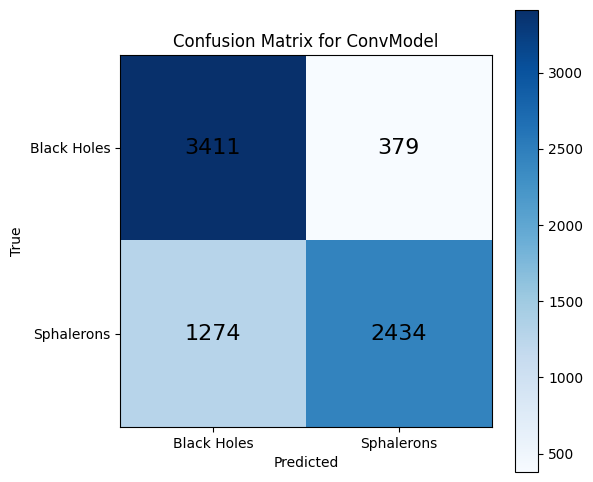

Average confusion matrix for ConvModelFPLMod:


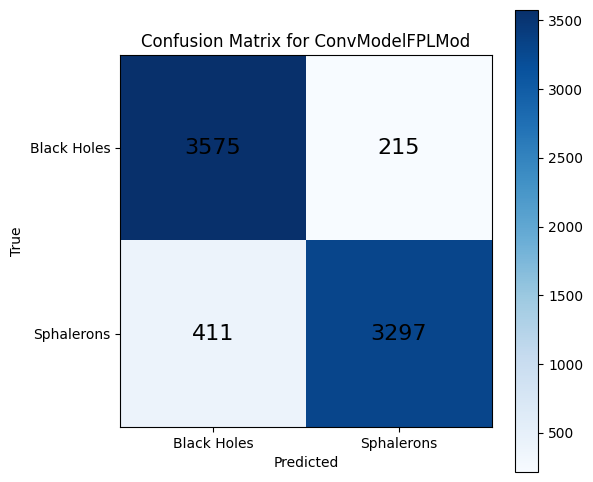

Average confusion matrix for ConvModelFPLRoll:


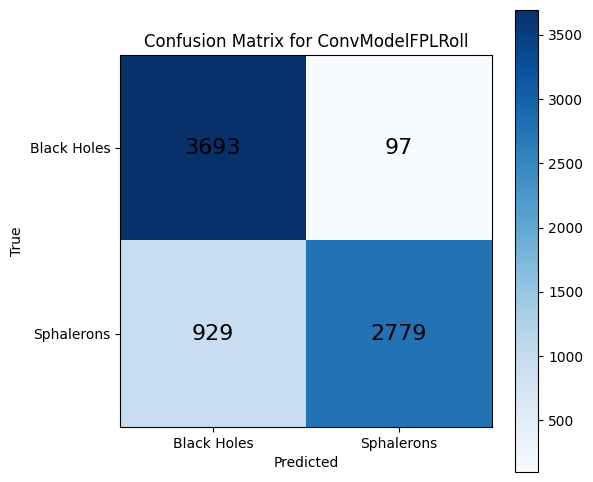

Average confusion matrix for ConvModelSimple:


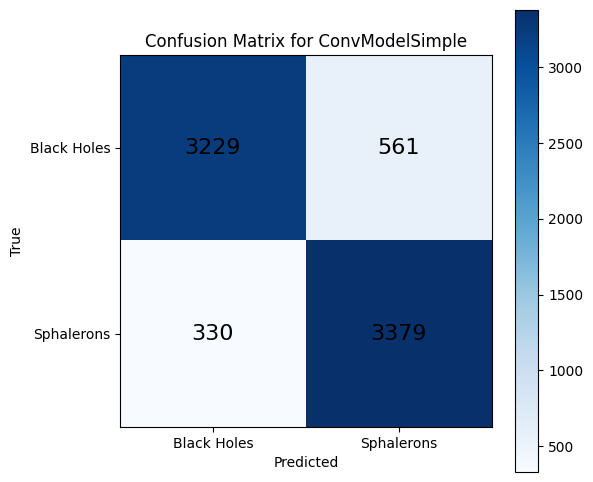

In [19]:
def train_multiple_runs(model_class, n_runs, n_epochs, train_loader, test_loader, dropout):
    all_run_metrics = []

    for run in range(n_runs):
        print(f"Run: {run + 1}/{n_runs}")

        model = model_class(dropout=dropout).to(device)
        optimizer = torch.optim.Adam(model.parameters())
        criterion = nn.CrossEntropyLoss().to(device)

        run_results = train.train(model, train_loader, test_loader, optimizer, criterion, n_epochs)
        all_run_metrics.append(run_results)

    # Compute average metrics
    avg_run_metrics = {}
    for metric in all_run_metrics[0][-1].keys():
        if metric not in ['all_preds', 'all_labels', 'epoch']:
            avg_run_metrics[metric] = [np.mean([run[epoch][metric] for run in all_run_metrics]) for epoch in range(n_epochs)]

    return avg_run_metrics, all_run_metrics


def plot_metrics(all_run_metrics, model_classes, metric_name):
    for i, run_metrics in enumerate(all_run_metrics):
        plt.plot(run_metrics[metric_name], label=f"{model_classes[i].__name__}")

    plt.title(f"Average {metric_name} over {n_runs} runs")
    plt.xlabel("Epoch")
    plt.ylabel(metric_name)
    plt.legend()
    plt.show()
    
def display_tabular_data(all_run_metrics, model_classes):
    for i, run_metrics in enumerate(all_run_metrics):
        model_name = model_classes[i].__name__
        print(f"Metrics for {model_name}:")
        data = {}
        for metric, values in run_metrics.items():
            data[metric] = values

        df = pd.DataFrame(data)
        display(df)
        print("\n")

def average_confusion_matrix(all_run_metrics, n_classes):
    all_matrices = [confusion_matrix(run[-1]['all_labels'], run[-1]['all_preds'], labels=range(n_classes)) for run in all_run_metrics]
    return np.mean(all_matrices, axis=0)

def plot_confusion_matrix(avg_cm, model_name):
    plt.figure(figsize=(6, 6))
    plt.imshow(avg_cm, cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks([0, 1], ['Black Holes', 'Sphalerons'])
    plt.yticks([0, 1], ['Black Holes', 'Sphalerons'])

    for i in range(2):
        for j in range(2):
            plt.text(j, i, int(avg_cm[i, j]), ha='center', va='center', color='black', fontsize=16)

    plt.colorbar()
    plt.show()

all_avg_run_metrics = []

#Here we define epochs, runs and dropout rate
n_runs = 3
n_epochs = 7
dropout = 0.5
model_classes = [nnmodel.ConvModel, nnmodel.ConvModelFPLMod, nnmodel.ConvModelFPLRoll, nnmodel.ConvModelSimple]
all_run_metrics = []


# THis where we run training and return all averaged metrics
for model_class in model_classes:
    avg_run_metrics, run_metrics = train_multiple_runs(model_class, n_runs, n_epochs, trainLoader, testLoader, dropout)
    all_avg_run_metrics.append(avg_run_metrics)
    all_run_metrics.append(run_metrics)


#This is where we plot our metrics
for metric_name in all_avg_run_metrics[0].keys():
    plot_metrics(all_avg_run_metrics, model_classes, metric_name)

#This is where we display all tabular data
display_tabular_data(all_avg_run_metrics, model_classes)


#THis is where we display confusion matrixes
for i, run_metrics in enumerate(all_run_metrics):
    avg_cm = average_confusion_matrix(run_metrics, n_classes=2)
    model_name = model_classes[i].__name__
    print(f"Average confusion matrix for {model_name}:")
    plot_confusion_matrix(avg_cm, model_name)

Code below makes it possible to save model

In [ ]:
# torch.save(model.state_dict(), model_save_path)
# model_save_path = "model_checkpoint.pth"
# # Load the saved model
# model.load_state_dict(torch.load(model_save_path))

# # Set the model to evaluation mode
# model.eval()

# # Function to test the model
# def test_model(model, test_loader, device):
#     correct = 0
#     total = 0

#     with torch.no_grad():
#         for data, target in test_loader:
#             data, target = data.to(device), target.to(device)
#             output = model(data)
#             _, predicted = torch.max(output.data, 1)
#             total += target.size(0)
#             correct += (predicted == target).sum().item()

#     accuracy = 100 * correct / total
#     print(f"Accuracy of the model on test data: {accuracy}%")

# # Test the model
# test_model(model, testLoader, device)